## 5. Decode a Compressed Message

In [117]:
!pip install scipy
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import helper_func as F
import os
import scipy.io.wavfile as wav
import sys
import load_data as ld

ModuleNotFoundError: No module named 'sounddevice'

a) Can you guess the message by simply displaying the compressed images?


cannot guess, no idea of dimensions from compressed signal alone and data too compressed to recover with eyes


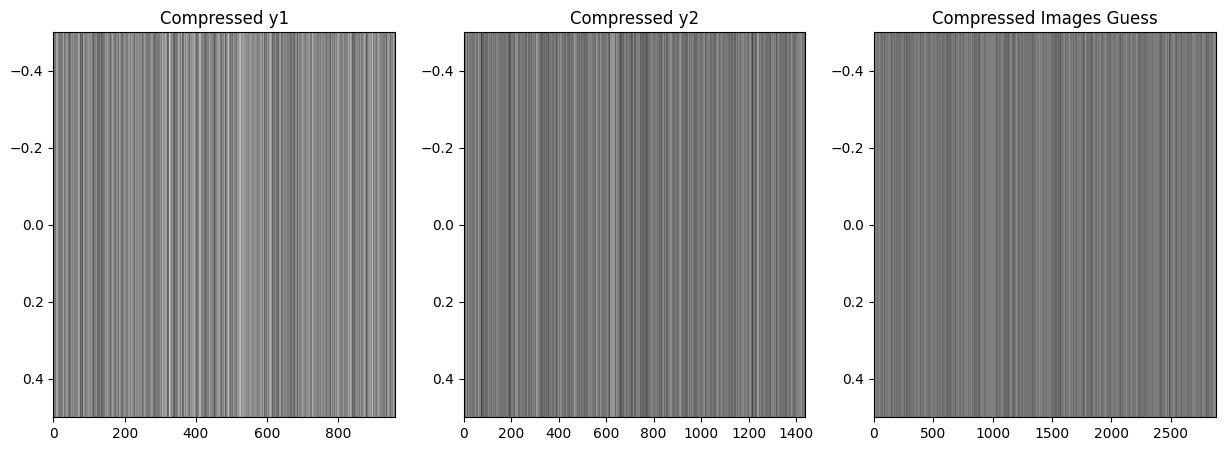

In [112]:
path = 'data/Y1 Y2 Y3 and A1 A2 A3.mat'
data = scipy.io.loadmat(path)

A_data = [data['A1'], data['A2'], data['A3']]
y_data = [data['y1'], data['y2'], data['y3']]


H = 90
W = 160 # height and width given by assigment, but impossible to guess from compressed image alone
img_shape = (H, W)


fig, axes = plt.subplots(1, 3, figsize=(5*3, 5))
for i, y in enumerate(y_data):
    axes[i].imshow(y[np.newaxis, :], aspect="auto")
    axes[i].set_title(f"Compressed y{i+1}")
plt.title("Compressed Images Guess")

print("cannot guess, no idea of dimensions from compressed signal alone and data too compressed to recover with eyes")


In [113]:
# OMP Algorithm
# takes measurements y, measurement
# ouputs signal x with s atom indices

# adpat OMP for image processing

def OMP(A, y, stop, tolerance = 1e-6):                  # max iterations should be n
    m, n = A.shape
    y = np.asarray(y).ravel()
    r = y.copy()                                       # r_0 = s
    lambdas = []                                        # support
    x_k = np.zeros(n)

    i = 0
    A_min = min(m, n)
    while(i < A_min):                                    # stop condition: max iterations
        correlation = np.abs(A.T @ r)                   # correlation of each atom with current residual

        lambda_k = np.argmax(correlation)               # ith best atom (max correlation)
        lambdas.append(lambda_k)

        A_sel = A[:, lambdas]                           # basis of atoms matrix
        ls = F.leastSquare(A_sel, y)
        x_k[lambdas] = ls

        r = y - (A_sel @ ls)                            # calc residual

        if F.l2Norm(r) <= stop or F.l2Norm(r) < tolerance:   # always assume noise and stop condition
            break

        i += 1

    return x_k, lambdas


In [ ]:
reconstructed_X = []
img_shape = (90, 160)


for i, (A, y) in enumerate(zip(A_data, y_data)):
    print(A.shape[0])
    stop = 500 # trial and error 
    x_hat, lambdas = OMP(A, y, stop)
    reconstructed_X.append(x_hat)

960
1440
2880


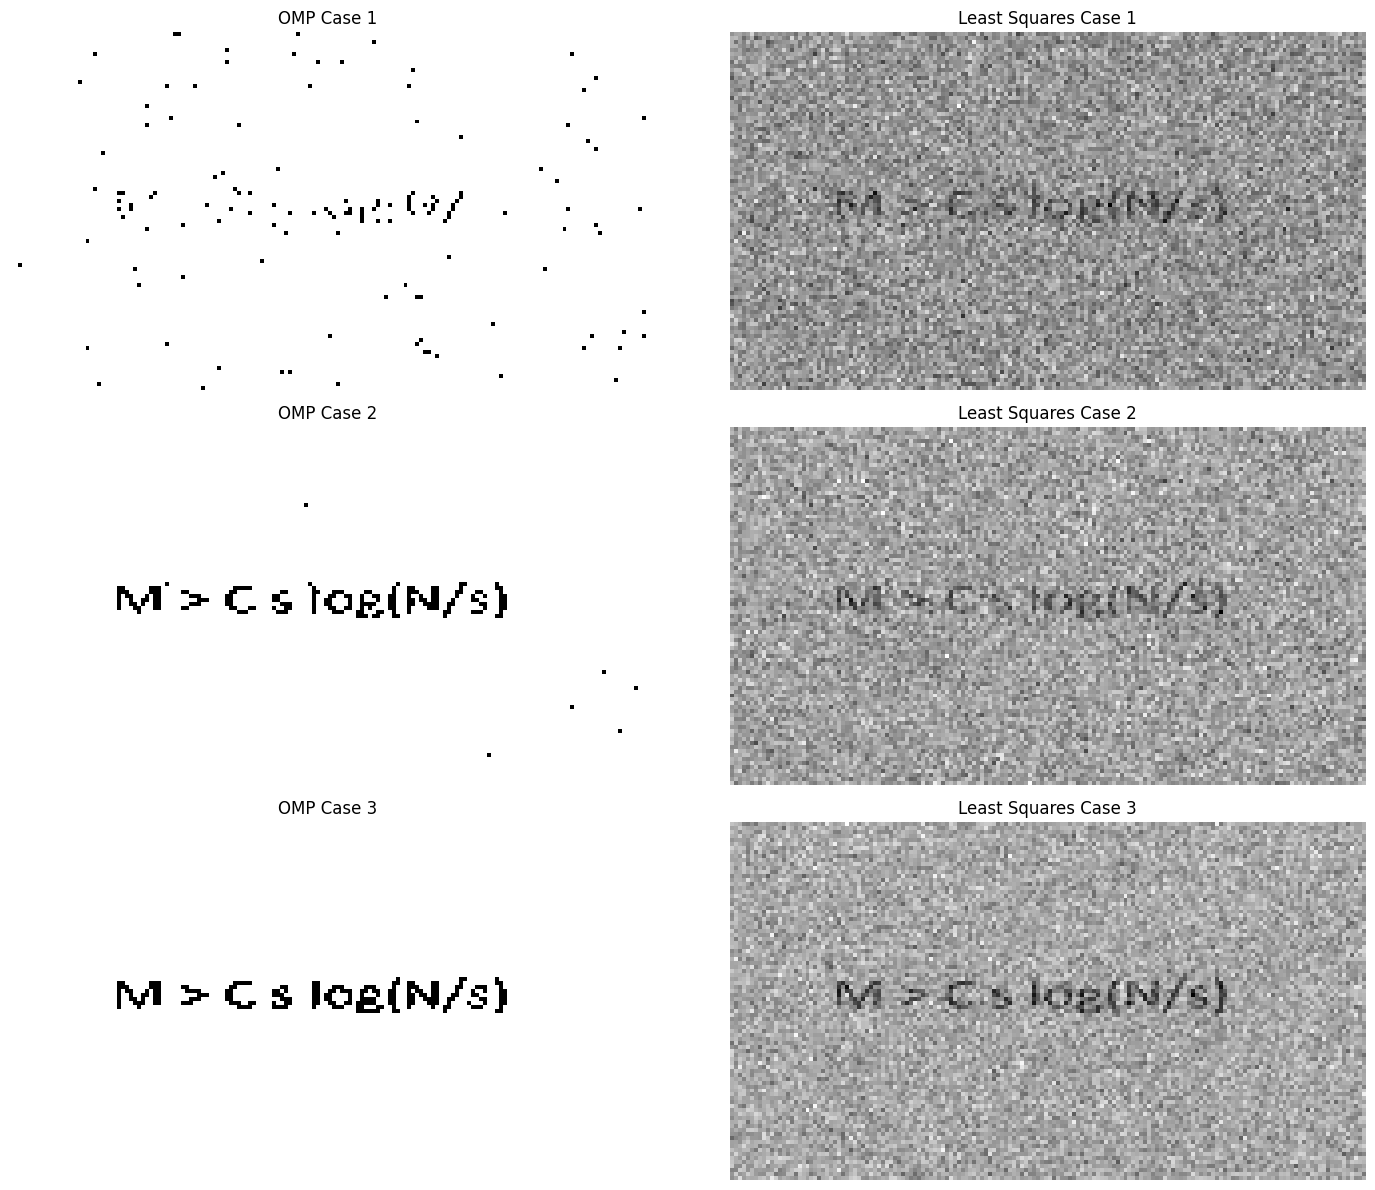

In [115]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['image.cmap'] = 'binary'

for i in range(3):
    # OMP Result
    ax_omp = axes[i, 0]
    img_omp = reconstructed_X[i].reshape(img_shape, order='F')
    
    ax_omp.imshow(img_omp > 1e-3)
    ax_omp.set_title(f"OMP Case {i+1}")
    ax_omp.axis('off')
    
    # Least Squares Result
    ax_ls = axes[i, 1]
    x_ls = F.leastSquare(A_data[i], y_data[i])
    img_ls = x_ls.reshape(img_shape, order='F')
    ax_ls.imshow(img_ls)
    ax_ls.set_title(f"Least Squares Case {i+1}")
    ax_ls.axis('off')

plt.tight_layout()
plt.show()